<a href="https://colab.research.google.com/github/mehrnaz1368/classification/blob/main/Clustering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
data= pd.read_csv('customer.csv')

In [3]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


#Convert Categorical Variable to Numerical

In [4]:
data['Gender'].replace(['Male', 'Female'],
                        [0, 1], inplace=True)

In [5]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       0   19                  15                      39
1           2       0   21                  15                      81
2           3       1   20                  16                       6
3           4       1   23                  16                      77
4           5       1   31                  17                      40


In [6]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


#Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
x= data.iloc[:,1:]
x

In [ ]:
x = np.nan_to_num(x)
d= StandardScaler(). fit_transform(x)
d

### (Attention) we can not use of data because first colum in "data" starts with object that is not essential. for this reseaon we determine an variable like "x" and then determine the column that we want to enter and use.

In [ ]:
data = np.nan_to_num(data)
k = StandardScaler(). fit_transform(data)
k

#Clustering by K_mean

In [11]:
from sklearn.cluster import KMeans
k_means = KMeans(init="k-means++", n_clusters=3, n_init=12)
k_means.fit(d)
labels = k_means.labels_
print(labels)

[0 0 2 0 2 0 2 0 1 0 1 0 2 0 1 0 2 0 1 0 1 0 2 0 2 0 2 0 2 0 1 0 1 0 2 0 2
 0 2 0 2 0 1 0 2 0 2 2 2 2 2 0 2 1 2 1 2 1 0 1 1 0 2 2 1 0 2 2 0 2 1 2 2 2
 1 0 2 1 0 2 1 1 1 2 0 1 2 0 0 2 2 0 1 2 2 0 2 0 1 0 0 2 1 0 1 0 2 1 1 1 1
 0 2 0 0 0 2 2 2 2 0 2 2 0 2 0 1 0 1 0 1 0 2 0 1 0 2 0 1 0 2 0 2 0 1 0 1 0
 2 0 1 0 2 0 2 0 1 0 1 0 2 0 1 0 1 0 1 0 2 0 1 0 1 0 2 0 1 0 1 0 2 0 1 0 2
 0 2 0 2 0 2 0 1 0 2 0 2 0 1 0]


#Determine the best number of K using sum_squared_errors (SSE)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Sum of Squared Errors')

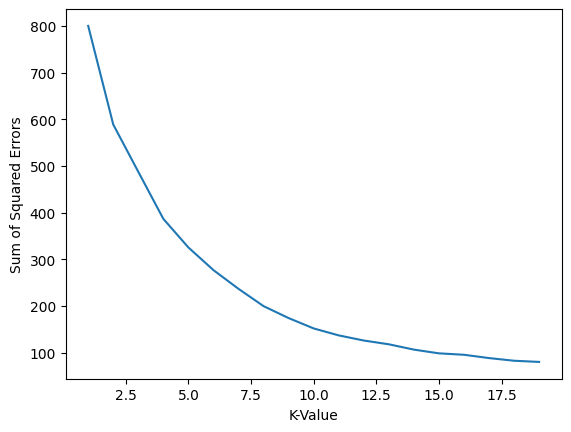

In [12]:
k = range(1,20)
sum_squared_errors = []

for i in k:
  model = KMeans(n_clusters = i)
  model.fit_predict(d)
  sum_squared_errors.append(model.inertia_)

plt.plot(k,sum_squared_errors)
plt.xlabel('K-Value')
plt.ylabel('Sum of Squared Errors')